<a href="https://colab.research.google.com/github/loukaBl/Checkpoint_Africa_climate_change/blob/main/Checkpoint_Africa_climate_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
filepath = '/content/drive/MyDrive/Colab Notebooks/Africa_climate_change.csv'
df = pd.read_csv(filepath)
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


In [ ]:
df.describe()

,PRCP,TAVG,TMAX,TMIN
count,177575.000000,458439.000000,363901.000000,332757.000000
mean,0.120941,77.029838,88.713969,65.548262
std,0.486208,11.523634,13.042631,11.536547
min,0.000000,-49.000000,41.000000,12.000000
25%,0.000000,70.000000,81.000000,58.000000
50%,0.000000,80.000000,90.000000,68.000000
75%,0.010000,85.000000,99.000000,74.000000
max,19.690000,110.000000,123.000000,97.000000


In [ ]:
df.isnull().sum()

,0
DATE,0
PRCP,287240
TAVG,6376
TMAX,100914
TMIN,132058
COUNTRY,0


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   DATE     464815 non-null  datetime64[ns]
 1   PRCP     177575 non-null  float64       
 2   TAVG     458439 non-null  float64       
 3   TMAX     363901 non-null  float64       
 4   TMIN     332757 non-null  float64       
 5   COUNTRY  464815 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 21.3+ MB


In [ ]:
df['YEAR'] = df['DATE'].dt.year
df.head()

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY,YEAR
0,1980-01-01,NaN,54.0,61.0,43.0,Tunisia,1980
1,1980-01-01,NaN,49.0,55.0,41.0,Tunisia,1980
2,1980-01-01,0.0,72.0,86.0,59.0,Cameroon,1980
3,1980-01-01,NaN,50.0,55.0,43.0,Tunisia,1980
4,1980-01-01,NaN,75.0,91.0,NaN,Cameroon,1980


In [ ]:
df_clean= df.dropna(subset=['TAVG'])
df_clean

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY,YEAR
0,1980-01-01,NaN,54.0,61.0,43.0,Tunisia,1980
1,1980-01-01,NaN,49.0,55.0,41.0,Tunisia,1980
2,1980-01-01,0.0,72.0,86.0,59.0,Cameroon,1980
3,1980-01-01,NaN,50.0,55.0,43.0,Tunisia,1980
4,1980-01-01,NaN,75.0,91.0,NaN,Cameroon,1980
...,...,...,...,...,...,...,...
464810,2023-08-23,NaN,85.0,89.0,NaN,Senegal,2023
464811,2023-08-23,NaN,80.0,90.0,72.0,Egypt,2023
464812,2023-08-23,NaN,87.0,NaN,73.0,Egypt,2023
464813,2023-08-23,0.0,82.0,94.0,NaN,Senegal,2023


In [ ]:
df_clean.isnull().sum()

,0
DATE,0
PRCP,285358
TAVG,0
TMAX,98693
TMIN,129837
COUNTRY,0
YEAR,0


/tmp/ipython-input-2184182166.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_temp = df_clean[df['COUNTRY'].isin(['Tunisia', 'Cameroon'])].groupby(['YEAR', 'COUNTRY'])['TAVG'].mean().reset_index()


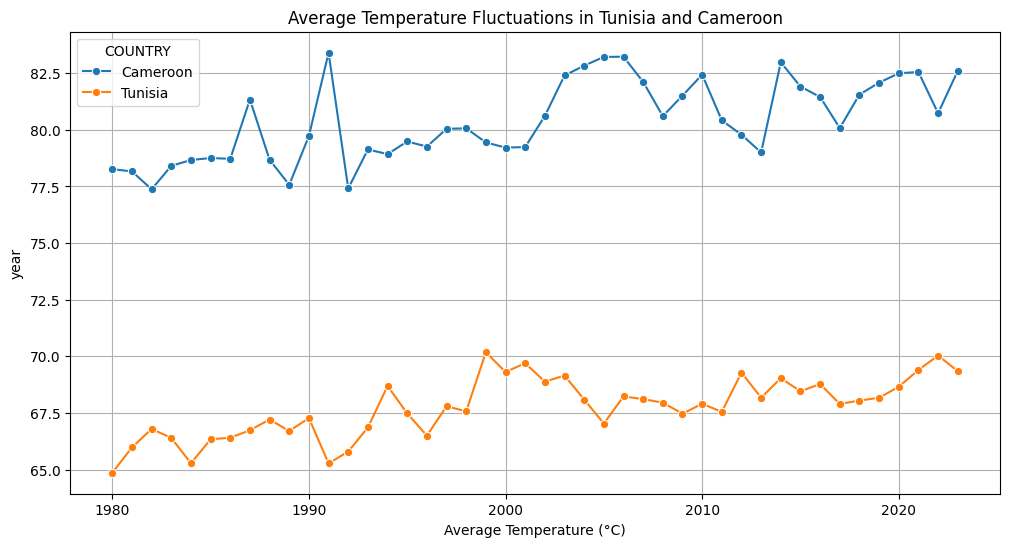

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

avg_temp = df_clean[df['COUNTRY'].isin(['Tunisia', 'Cameroon'])].groupby(['YEAR', 'COUNTRY'])['TAVG'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=avg_temp, x='YEAR', y='TAVG', hue='COUNTRY', marker='o')
plt.title('Average Temperature Fluctuations in Tunisia and Cameroon')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('year')
plt.grid(True)
plt.show()

Interprétation
Cameroun présente des températures moyennes plus élevées que la Tunisie quasiment chaque année, cohérent avec son climat plus tropical.
Les deux pays montrent une légère tendance à la hausse des moyennes annuelles, ce qui peut suggérer un réchauffement progressif sur la période 1980–2005.

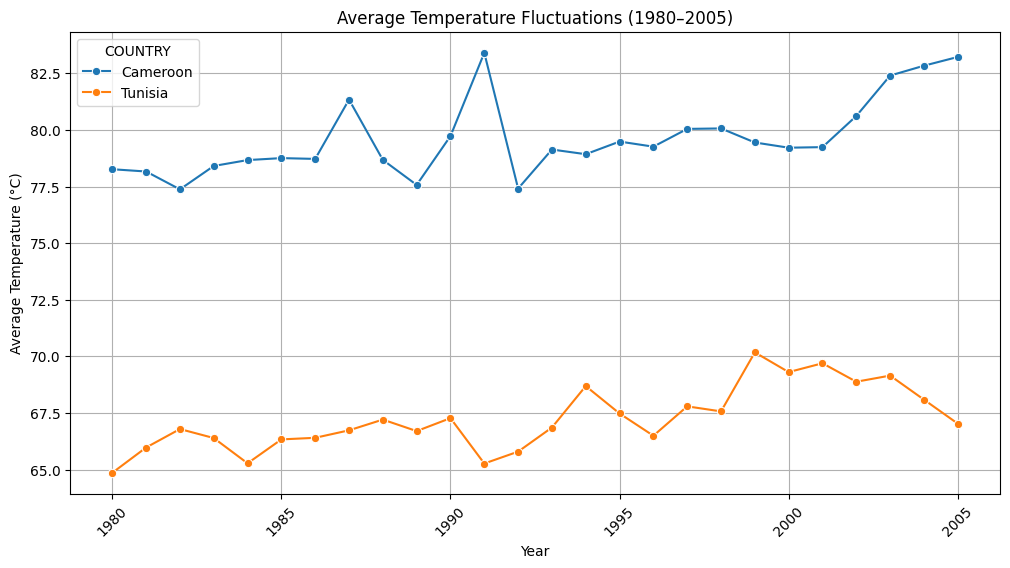

In [ ]:
zoomed_temp = avg_temp[(avg_temp['YEAR'] >= 1980) & (avg_temp['YEAR'] <= 2005)]

plt.figure(figsize=(12,6))
sns.lineplot(data=zoomed_temp, x='YEAR', y='TAVG', hue='COUNTRY', marker='o')
plt.title('Average Temperature Fluctuations (1980–2005)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Interpretation – Zoomed period (1980–2005)

When you zoom between 1980 and 2005 (as required in the exercise):

The warming trend becomes clearer, especially for Tunisia.

Temperature variability is smaller in Tunisia than Cameroon.

This period highlights the early signals of global warming in Africa.

In [ ]:
senegal_temp = df_clean[df['COUNTRY'] == 'Senegal']

/tmp/ipython-input-1156320263.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  senegal_temp = df_clean[df['COUNTRY'] == 'Senegal']


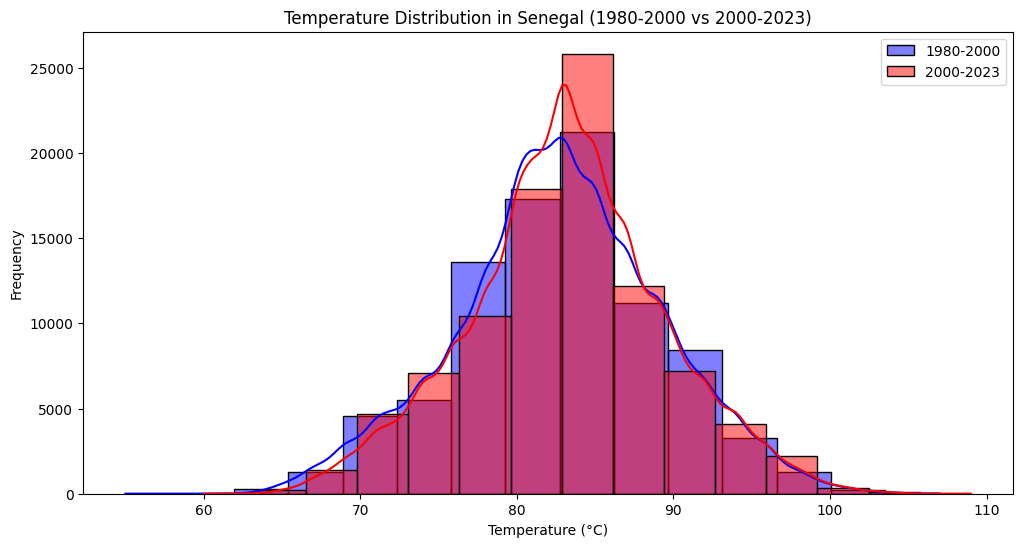

In [ ]:
period1 = senegal_temp[(senegal_temp['YEAR'] >= 1980) & (senegal_temp['YEAR'] <= 2000)]
period2 = senegal_temp[(senegal_temp['YEAR'] > 2000) & (senegal_temp['YEAR'] <= 2023)]

plt.figure(figsize=(12,6))
sns.histplot(period1['TAVG'], color='blue', label='1980-2000', kde=True, alpha=0.5, bins=15)
sns.histplot(period2['TAVG'], color='red', label='2000-2023', kde=True, alpha=0.5, bins=15)
plt.title('Temperature Distribution in Senegal (1980-2000 vs 2000-2023)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Histograms – Senegal temperature distribution
When you create two histograms in the same figure for Senegal:
Period 1980–2000
Temperatures are more concentrated around lower values
Distribution is narrower
Indicates more stable climate conditions
Period 2000–2023
Histogram shifts to the right
Wider spread of temperatures
More frequent high-temperature values
✔️ Conclusion: Senegal experienced higher and more variable temperatures after 2000, a clear sign of warming.

/tmp/ipython-input-2977966342.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_country_temp, x='COUNTRY', y='TAVG', palette='viridis')


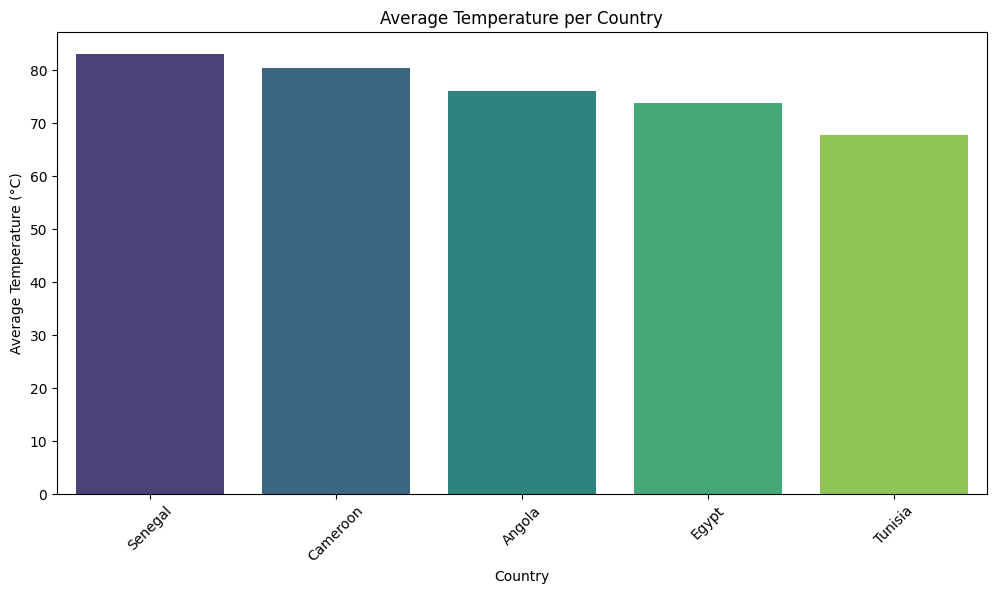

In [ ]:
avg_country_temp = df.groupby('COUNTRY')['TAVG'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_country_temp, x='COUNTRY', y='TAVG', palette='viridis')
plt.title('Average Temperature per Country')
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

Easy country-to-country comparison
Clear ranking of hottest vs coolest countries
More readable than line charts for averages

"How can we compare the temperatures of each country between 1980 and 2023?"

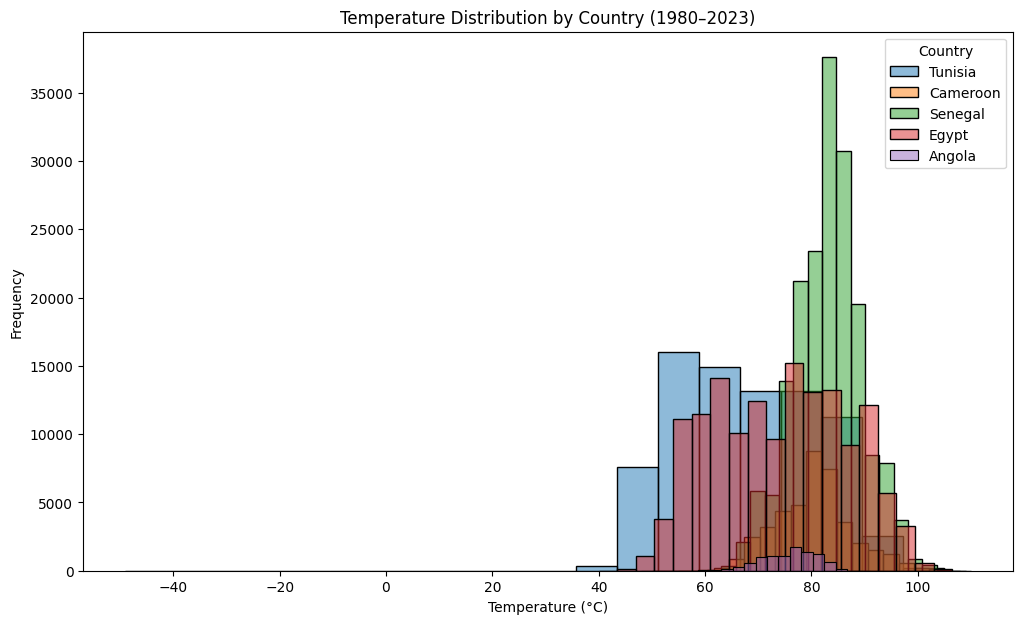

In [ ]:
temp_1980_2023 = df_clean[(df_clean['YEAR'] >= 1980) & (df_clean['YEAR'] <= 2023)]
plt.figure(figsize=(12,7))

countries = temp_1980_2023['COUNTRY'].unique()
colors = sns.color_palette("tab10", len(countries))  # a color for each country

for i, country in enumerate(countries):
    subset = temp_1980_2023[temp_1980_2023['COUNTRY'] == country]
    sns.histplot(subset['TAVG'], bins=20, alpha=0.5, label=country, color=colors[i], kde=False)

plt.title('Temperature Distribution by Country (1980–2023)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend(title='Country')
plt.show()

Which region shows the highest variability?

/tmp/ipython-input-1181119412.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_variability, x='COUNTRY', y='Temp_SD', palette='magma')


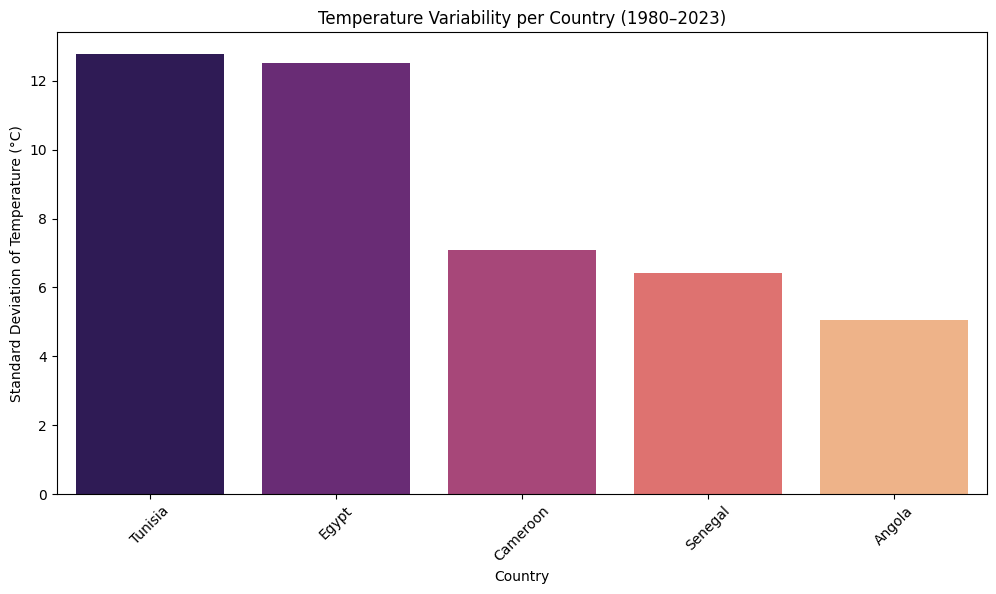

In [ ]:
temp_1980_2023_filtered = df_clean[(df_clean['YEAR'] >= 1980) & (df_clean['YEAR'] <= 2023)]
region_variability = temp_1980_2023_filtered.groupby('COUNTRY')['TAVG'].std().reset_index()
region_variability = region_variability.sort_values(by='TAVG', ascending=False)
region_variability.rename(columns={'TAVG': 'Temp_SD'}, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(data=region_variability, x='COUNTRY', y='Temp_SD', palette='magma')
plt.title('Temperature Variability per Country (1980–2023)')
plt.xlabel('Country')
plt.ylabel('Standard Deviation of Temperature (°C)')
plt.xticks(rotation=45)
plt.show()